In [28]:
import pandas as pd
df = pd.read_csv("healthcare-dataset-stroke-data.csv", delimiter=",", encoding = 'utf-8')
df["age"] = df["age"].astype(int)
df.drop('id', inplace=True, axis=1)
df.columns = df.columns.str.lower()
columns = list(df.columns)
for column in columns:
  if df[column].dtype == 'object':
    df[column] = df[column].str.lower()

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,female,61,0,0,yes,self-employed,rural,202.21,NaN,never smoked,1
2,male,80,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,female,49,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int32  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 419.3+ KB


In [30]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [31]:
df['bmi'].fillna(round(df['bmi'].mean(), 1), inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [32]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,female,61,0,0,yes,self-employed,rural,202.21,28.9,never smoked,1
2,male,80,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,female,49,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1


In [33]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoder = LabelEncoder()
columns_to_encode = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

for column in columns_to_encode:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
    print(f"Przypisanie dla kolumny {column}:")
    print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
    print()

df_encoded.head()

Przypisanie dla kolumny gender:
{'female': 0, 'male': 1, 'other': 2}

Przypisanie dla kolumny ever_married:
{'no': 0, 'yes': 1}

Przypisanie dla kolumny work_type:
{'children': 0, 'govt_job': 1, 'never_worked': 2, 'private': 3, 'self-employed': 4}

Przypisanie dla kolumny residence_type:
{'rural': 0, 'urban': 1}

Przypisanie dla kolumny smoking_status:
{'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'unknown': 3}



,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,3,1,228.69,36.6,0,1
1,0,61,0,0,1,4,0,202.21,28.9,1,1
2,1,80,0,1,1,3,0,105.92,32.5,1,1
3,0,49,0,0,1,3,1,171.23,34.4,2,1
4,0,79,1,0,1,4,0,174.12,24.0,1,1


RandomForestClassifierModel Train Score is: 1.0
RandomForestClassifierModel Test Score is: 0.943
Accuracy: 0.943
Precision: 0.918
Recall: 0.973
F1 Score: 0.944
Confusion Matrix:
[[1330  127]
 [  40 1420]]


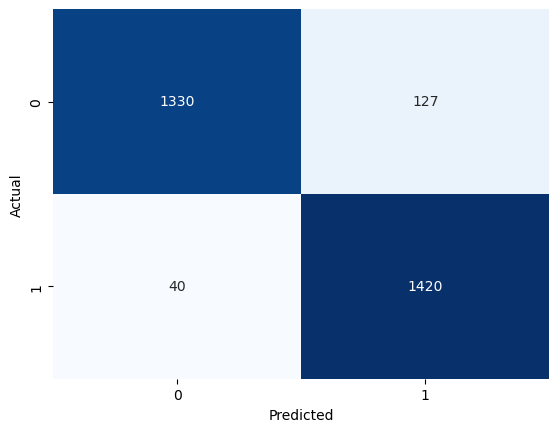

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

randomforest_model = RandomForestClassifier(random_state=42)
randomforest_model.fit(X_train_scaled, y_train)

train_score = round(randomforest_model.score(X_train_scaled, y_train), 3)
test_score = round(randomforest_model.score(X_test_scaled, y_test), 3)

print('RandomForestClassifierModel Train Score is:', train_score)
print('RandomForestClassifierModel Test Score is:', test_score)

y_pred = randomforest_model.predict(X_test_scaled)

accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred, zero_division=1), 3)
recall = round(recall_score(y_test, y_pred, zero_division=1), 3)
f1 = round(f1_score(y_test, y_pred, zero_division=1), 3)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression Model Train Score: 0.805
Logistic Regression Model Test Score: 0.807
Accuracy: 0.807
Precision: 0.793
Recall: 0.832
F1 Score: 0.812
Confusion Matrix:
[[1139  318]
 [ 245 1215]]


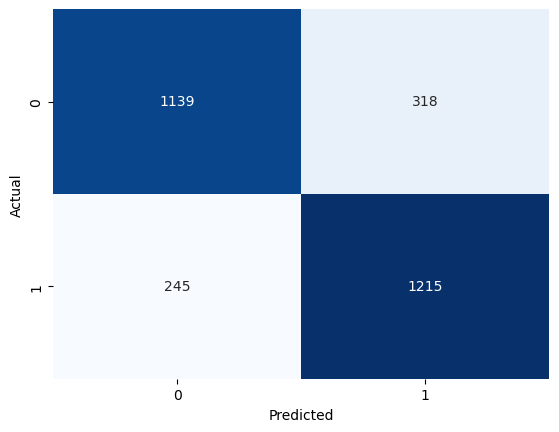

In [35]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_scaled, y_train)

train_score = round(logistic_regression_model.score(X_train_scaled, y_train), 3)
test_score = round(logistic_regression_model.score(X_test_scaled, y_test), 3)

print('Logistic Regression Model Train Score:', train_score)
print('Logistic Regression Model Test Score:', test_score)

y_pred = logistic_regression_model.predict(X_test_scaled)

accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred, zero_division=1), 3)
recall = round(recall_score(y_test, y_pred, zero_division=1), 3)
f1 = round(f1_score(y_test, y_pred, zero_division=1), 3)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

kNN Model Train Score: 0.905
kNN Model Test Score: 0.87


C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.87
Precision: 0.818
Recall: 0.951
F1 Score: 0.88
Confusion Matrix:
[[1148  309]
 [  71 1389]]


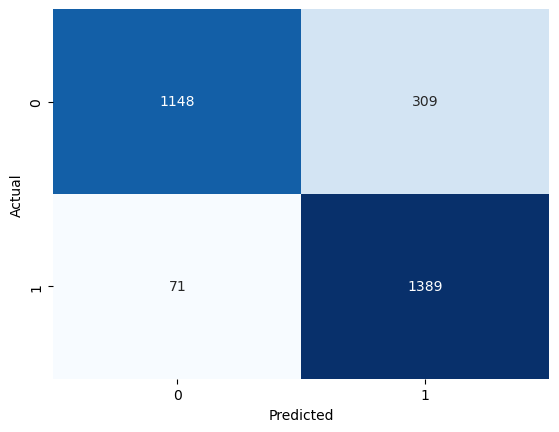

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

train_score = round(knn_model.score(X_train_scaled, y_train), 3)
test_score = round(knn_model.score(X_test_scaled, y_test), 3)

print('kNN Model Train Score:', train_score)
print('kNN Model Test Score:', test_score)

y_pred = knn_model.predict(X_test_scaled)

accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred, zero_division=1), 3)
recall = round(recall_score(y_test, y_pred, zero_division=1), 3)
f1 = round(f1_score(y_test, y_pred, zero_division=1), 3)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
cv_scores_rf = cross_val_score(randomforest_model, X_train_scaled, y_train, cv=5)
mean_cv_score_rf = round(cv_scores_rf.mean(), 3)
print('Random Forest Mean Cross-Validation Score:', mean_cv_score_rf)

cv_scores_lr = cross_val_score(logistic_regression_model, X_train_scaled, y_train, cv=5)
mean_cv_score_lr = round(cv_scores_lr.mean(), 3)
print('Logistic Regression Mean Cross-Validation Score:', mean_cv_score_lr)

cv_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
mean_cv_score_knn = round(cv_scores_knn.mean(), 3)
print('kNN Mean Cross-Validation Score:', mean_cv_score_knn)

Random Forest Mean Cross-Validation Score: 0.926
Logistic Regression Mean Cross-Validation Score: 0.803


C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

kNN Mean Cross-Validation Score: 0.859


C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim